In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Loan Eligibility prediction/loan_data.csv'

In [5]:
df = pd.read_csv(path)
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [6]:
df.shape

(577, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


In [8]:
df.describe()

,ApplicantIncome,LoanAmount
count,577.000000,577.000000
mean,5297.119584,144968.804159
std,5853.236196,82704.181660
min,150.000000,9000.000000
25%,2889.000000,100000.000000
50%,3800.000000,127000.000000
75%,5746.000000,167000.000000
max,81000.000000,650000.000000


**Exploratory Data Analysis**

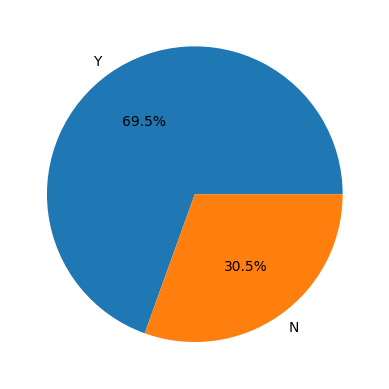

In [9]:
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,labels=temp.index,autopct='%1.1f%%')
plt.show()

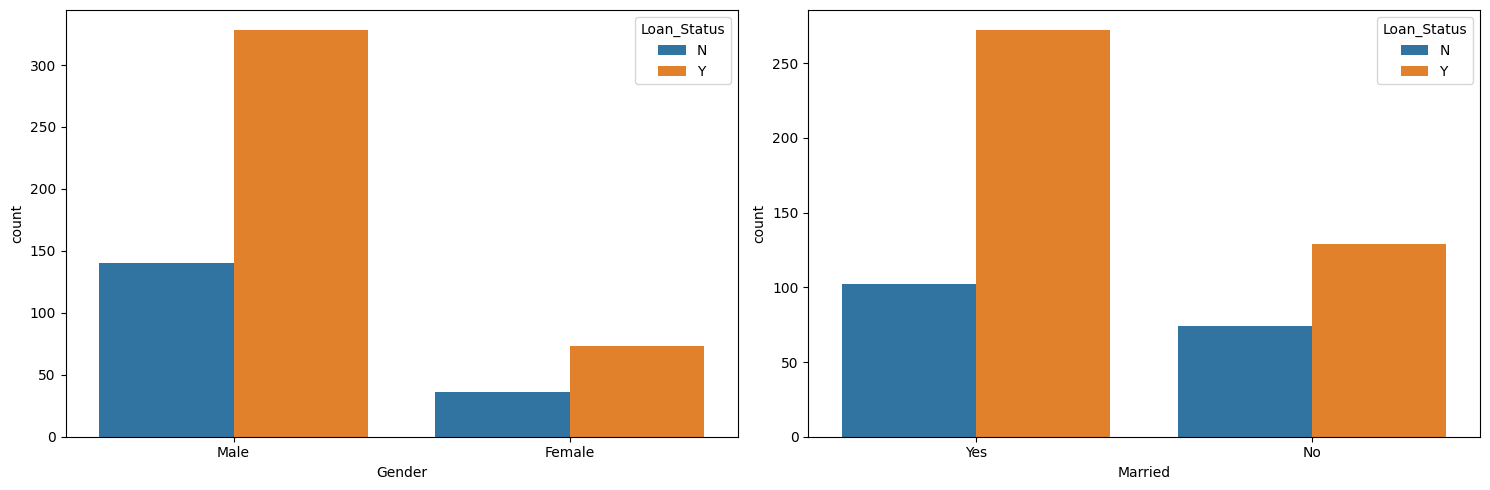

In [10]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
  plt.subplot(1, 2, i+1)
  sb.countplot(x = df[col], hue=df['Loan_Status'])
plt.tight_layout()
plt.show()

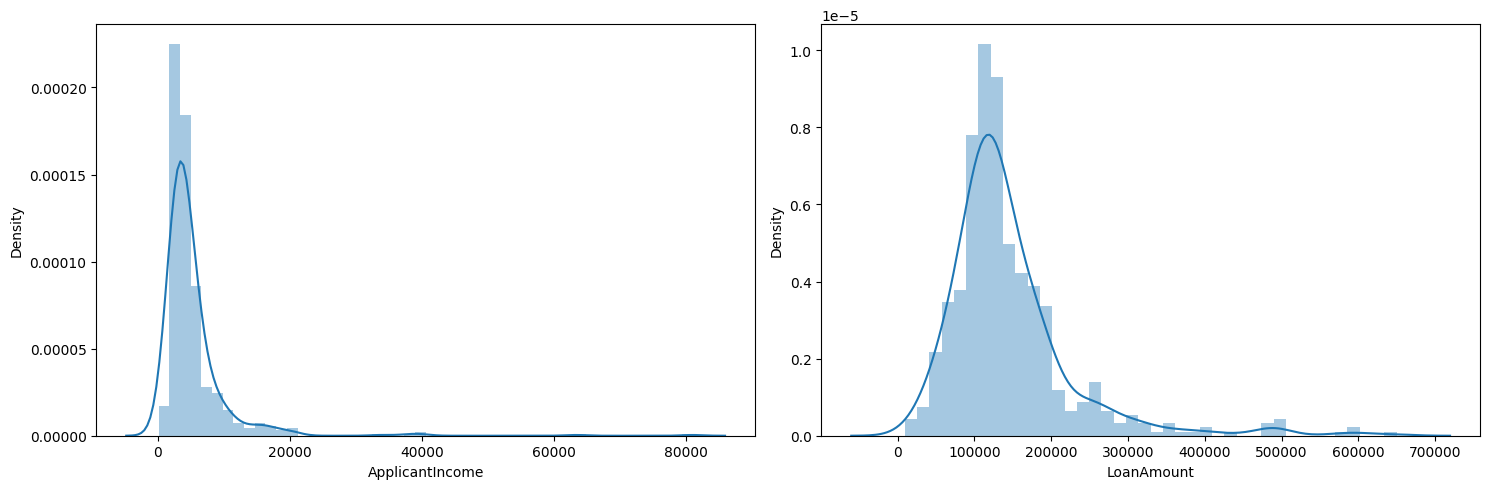

In [11]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

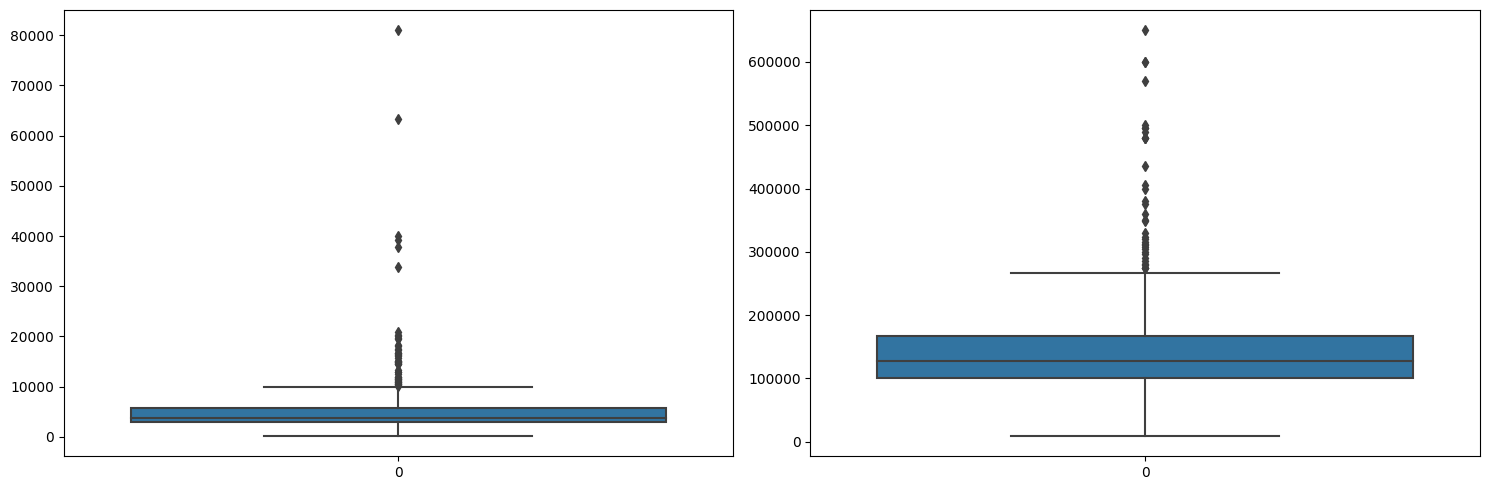

In [12]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [13]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

In [14]:
df.groupby('Gender').mean()['LoanAmount']

Gender
Female    118822.429907
Male      139289.823009
Name: LoanAmount, dtype: float64

In [15]:
df.groupby(['Married', 'Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116115.384615
         Male      126644.628099
Yes      Female    126103.448276
         Male      143912.386707
Name: LoanAmount, dtype: float64

In [16]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    return data

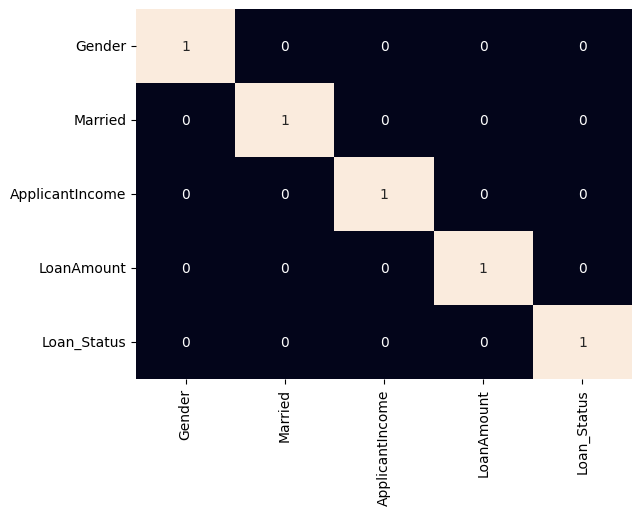

In [17]:
# Applying function in whole column
df = encode_labels(df)

# Generating Heatmap
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [18]:
features = df.drop('Loan_Status', axis=1)
target = df['Loan_Status'].values

In [19]:
X_train, X_val,Y_train, Y_val = train_test_split(features, target,test_size=0.2,random_state=10)

In [20]:
# As the data was highly imbalanced we will balance
# it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)

X_train.shape, X.shape

((447, 4), (616, 4))

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [22]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(X, Y)

print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
print()

Training Accuracy :  0.6136363636363635
Validation Accuracy :  0.4908403026682596



In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.26      0.29      0.28        31
           1       0.72      0.69      0.70        81

    accuracy                           0.58       112
   macro avg       0.49      0.49      0.49       112
weighted avg       0.59      0.58      0.59       112

